# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
print("Shape of merged_data DataFrame:", merged_data.shape)

Shape of merged_data DataFrame: (1893, 8)


In [3]:
print("Sample of merged_data DataFrame:")
print(merged_data.head())


Sample of merged_data DataFrame:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [4]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()

# Print the result
num_mice


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

# Display the duplicate mice
duplicate_mice_ids



array(['g989'], dtype=object)

In [6]:
num_rows=merged_data.shape[0]
num_rows

1893

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'  

# Get all the data for the specified duplicate mouse ID
all_data_for_duplicate_mouse = merged_data[merged_data['Mouse ID'] != duplicate_mouse_id]

# Display all the data for the duplicate mouse ID
all_data_for_duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
num_rows=all_data_for_duplicate_mouse.shape[0]
num_rows

13

In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Specify the duplicate mouse ID you want to drop
duplicate_mouse_id = 'g989'

# Drop rows with the specified duplicate mouse ID
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

# Display the cleaned DataFrame without the specified duplicate mouse ID
cleaned_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.
cleaned_data = merged_data.drop_duplicates(subset='Mouse ID', keep='first')
num_mice_clean = cleaned_data['Mouse ID'].nunique()

# Print the result
num_mice_clean


249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by 'Drug Regimen' and calculate summary statistics
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Display the summary statistics table
print("Summary Statistics of Tumor Volume for Each Drug Regimen:")
summary_stats


Summary Statistics of Tumor Volume for Each Drug Regimen:


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Group the data by 'Drug Regimen' and calculate summary statistics using agg function
summary_stats = merged_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Flatten the multi-level columns for better readability
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Display the summary statistics table
print("Summary Statistics of Tumor Volume for Each Drug Regimen:")
summary_stats


Summary Statistics of Tumor Volume for Each Drug Regimen:


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

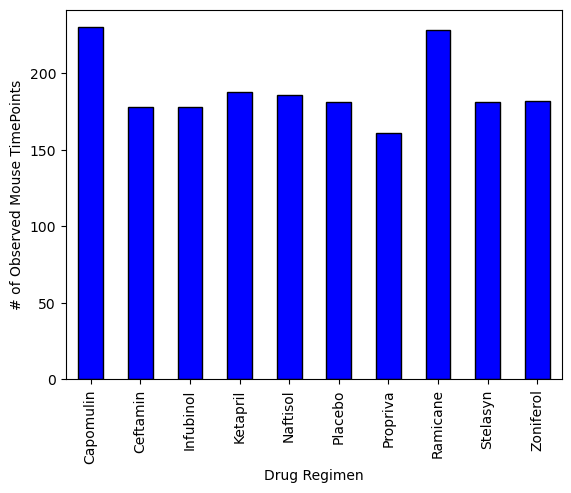

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Drug Regimen' and count the number of rows for each group
counts_per_regimen = merged_data.groupby('Drug Regimen').size()

# Create a bar plot
counts_per_regimen.plot(kind='bar', color='blue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse TimePoints')

# Display the plot
plt.show()


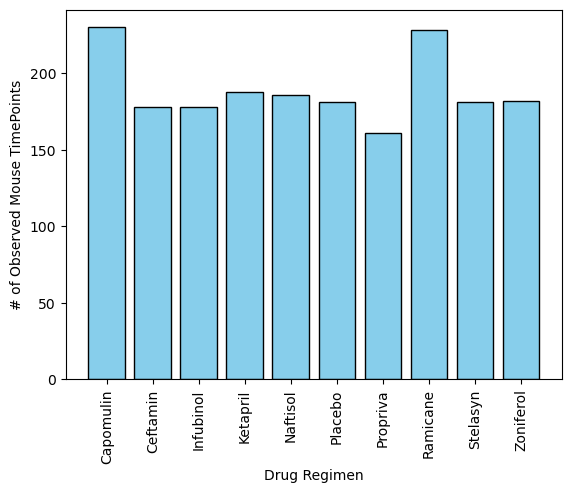

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Group the data by 'Drug Regimen' and count the number of rows for each group
counts_per_regimen = merged_data.groupby('Drug Regimen').size()

# Create a bar plot using pyplot
plt.bar(counts_per_regimen.index, counts_per_regimen, color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse TimePoints')


# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


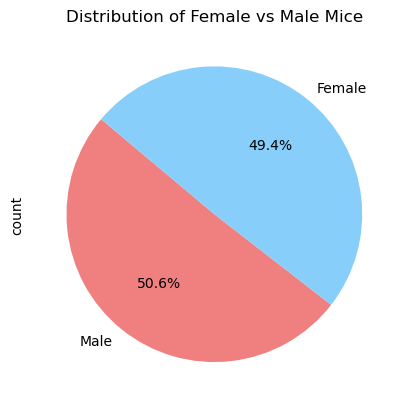

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Sex' and count the number of mice for each gender
gender_distribution = merged_data['Sex'].value_counts()

# Create a pie plot using pandas plot method
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)

# Set plot title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()


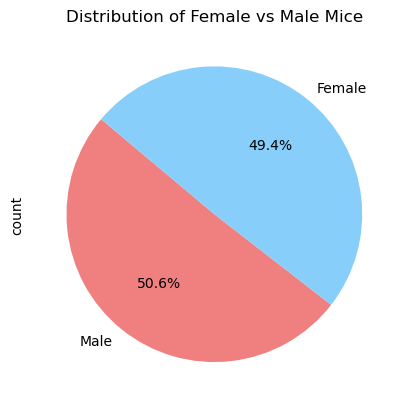

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Group the data by 'Sex' and count the number of mice for each gender
gender_distribution = merged_data['Sex'].value_counts()

# Create a pie plot using pandas plot method
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)

# Set plot title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# List of the specified treatment regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame to include only the specified treatment regimens
filtered_df = merged_data[merged_data['Drug Regimen'].isin(target_regimens)]

# Group the filtered data by Mouse ID
grouped_df = filtered_df.groupby('Mouse ID')

# Calculate the final tumor volume for each mouse
final_tumor_volumes = grouped_df['Tumor Volume (mm3)'].last()

# Display the result
final_tumor_volumes

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = final_tumor_volumes.reset_index(name='Final Tumor Volume (mm3)')

# Merge the original DataFrame with the final tumor volumes DataFrame on 'Mouse ID'
merged_data_tumor = pd.merge(merged_data, final_tumor_df, on='Mouse ID', how='left')

# Display the merged DataFrame
merged_data_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1889,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1890,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1891,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [18]:
# Assuming merged_data is your DataFrame
unique_drug_regimens = merged_data['Drug Regimen'].unique()

# Print the unique drug regimens
print("Unique Drug Regimens:", list(unique_drug_regimens))


Unique Drug Regimens: ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


In [19]:
# Assuming 'Drug Regimen' and 'Tumor Volume (mm3)' are valid columns in your DataFrame

# Get unique treatments (Drug Regimens)
unique_treatments = merged_data_tumor['Drug Regimen'].unique()

# Create an empty list to store treatments
treatments = []

# Append each unique treatment to the list
for treatment in unique_treatments:
    treatments.append(treatment)

# Alternatively, you can achieve the same result using a list comprehension:
# treatments = [treatment for treatment in unique_treatments]

# Print the list of treatments
print("List of Treatments:", treatments)

# Create an empty list to store tumor volume data
tumor_vol_data = []

# Iterate over the unique treatments and get the tumor volumes
for treatment in unique_treatments:
    # Filter the rows for the current treatment
    treatment_rows = merged_data_tumor[merged_data_tumor['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = treatment_rows['Tumor Volume (mm3)']
    
    # Append the tumor volumes to the list
    tumor_vol_data.append(tumor_volumes.values)

# Print the list of tumor volume data for each treatment
for treatment, tumor_volumes in zip(unique_treatments, tumor_vol_data):
    print(f"Treatment: {treatment}")
    print(tumor_volumes)
    print()

# Calculate the IQR and identify potential outliers
merged_data_tumor = merged_data_tumor.dropna()  # Drop any NaN values in 'Tumor Volume (mm3)'

# Create an empty dictionary to store tumor volume subsets for each treatment
tumor_volume_subsets = {}

# Iterate over the unique treatments and calculate IQR and potential outliers
for treatment in unique_treatments:
    # Filter the rows for the current treatment
    treatment_rows = merged_data_tumor[merged_data_tumor['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = treatment_rows['Tumor Volume (mm3)'].values
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(tumor_volumes, 25)
    Q3 = np.percentile(tumor_volumes, 75)
    IQR = Q3 - Q1

    # Calculate lower and upper boundaries
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR

    # Identify potential outliers
    potential_outliers = [value for value in tumor_volumes if value < lower_boundary or value > upper_boundary]

    # Add the subset to the dictionary
    tumor_volume_subsets[treatment] = {'Tumor Volumes': tumor_volumes, 'Potential Outliers': potential_outliers}

# Print the subsets
for treatment, subset in tumor_volume_subsets.items():
    {treatment}
    {subset['Tumor Volumes']}
    {subset['Potential Outliers']}



List of Treatments: ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
Treatment: Ramicane
[45.         38.82589807 35.01427146 34.22399174 32.99772858 33.46457735
 31.09949753 26.54699343 24.36550471 22.05012627 45.         45.85153062
 40.17055848 40.67812852 41.211897   35.56939935 34.95258284 30.96039194
 31.36940573 29.12847181 45.         38.71187185 34.8509979  35.27690634
 35.92865083 36.33856894 35.47402235 35.8461407  32.79817119 30.27623175
 45.         42.99887638 43.74822357 39.89743533 36.71229535 37.44444543
 37.96993365 38.62753581 35.1145752  30.56462509 45.         42.18878662
 42.95211843 38.68851607 36.89001635 37.41411419 37.81593487 38.50482444
 34.02209336 30.63869575 45.         44.01490022 44.49716216 45.25253427
 42.16834132 37.86066936 34.75724046 35.17014843 31.00186078 31.56046955
 45.         45.52187471 40.3751382  36.94027399 37.4788685  33.20500824
 33.817758   34.48752204 34.954733

NameError: name 'np' is not defined

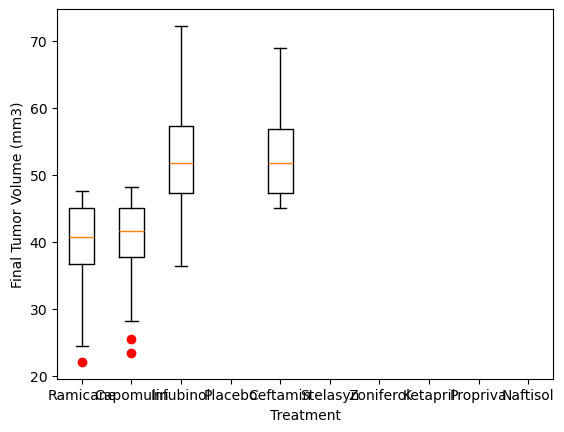

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [merged_data_tumor[merged_data_tumor['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].values
                for treatment in unique_treatments]
plt.boxplot(data_to_plot, labels=unique_treatments, sym='r') 
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

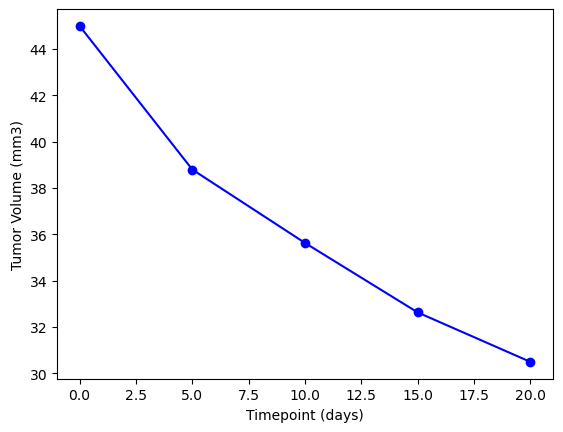

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data_for_mouse = merged_data[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == 'f966')]

# Check if the filtered DataFrame is not empty
if not capomulin_data_for_mouse.empty:
    # Plot the line graph
    plt.plot(capomulin_data_for_mouse['Timepoint'], capomulin_data_for_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

    # Set labels and title
    plt.xlabel('Timepoint (days)')
    plt.ylabel('Tumor Volume (mm3)')
   

    # Show the plot
    plt.show()

In [30]:
# Assuming your DataFrame is named merged_data
capomulin_mice = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin', 'Mouse ID'].unique()

# Print the list of mice treated with Capomulin
print("Mice treated with Capomulin:", capomulin_mice)


Mice treated with Capomulin: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


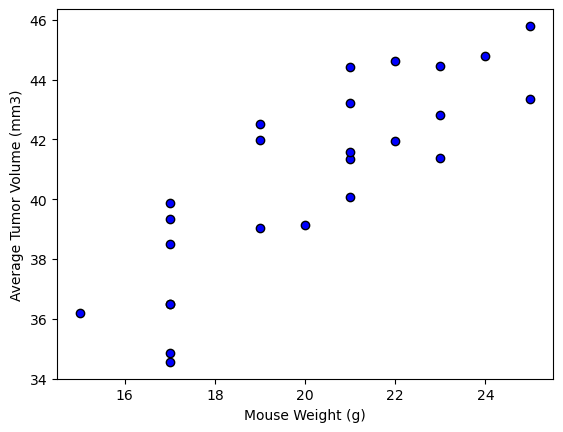

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Assuming your DataFrame is named merged_data
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the original Capomulin data to get mouse weights
merged_capomulin_data = pd.merge(capomulin_data, avg_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Extract relevant columns for the scatter plot
scatter_data = merged_capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_average']].drop_duplicates()

# Plot the scatter plot
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', edgecolors='black')

# Set labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

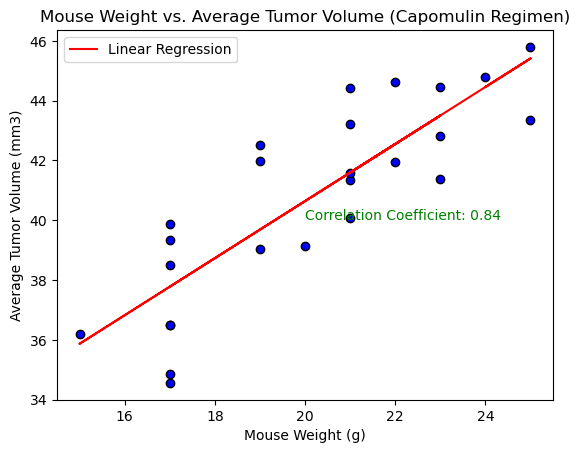

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Extract relevant columns for the scatter plot
scatter_data = merged_capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_average']].drop_duplicates()

# Calculate the correlation coefficient
correlation_coefficient = scatter_data['Weight (g)'].corr(scatter_data['Tumor Volume (mm3)_average'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)_average'])

# Create the linear regression line
regression_line = slope * scatter_data['Weight (g)'] + intercept

# Plot the scatter plot
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', edgecolors='black')

# Plot the linear regression line
plt.plot(scatter_data['Weight (g)'], regression_line, color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the correlation coefficient on the plot
plt.text(20, 40, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='green')

# Show the plot
plt.legend()
plt.show()
